**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

In [2]:
df=pd.read_csv('C:/users/8most/Downloads/temp/weather_data.csv')

**Data Preprocessing**

**Exploring Data**

In [3]:
# Check the basic info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042345 entries, 0 to 1042344
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          997460 non-null  object 
 1   Date_Time         980575 non-null  object 
 2   Temperature_C     986878 non-null  float64
 3   Humidity_pct      985451 non-null  float64
 4   Precipitation_mm  981518 non-null  float64
 5   Wind_Speed_kmh    993023 non-null  float64
dtypes: float64(4), object(2)
memory usage: 47.7+ MB


In [4]:
# Convert 'Date_Time' column to datetime format
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Verify the data type of 'Date_Time'
print(df['Date_Time'].dtype)

datetime64[ns]


In [5]:
# Display the first 10 rows of the dataset
df.head(10)

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,NaN,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
5,San Diego,NaT,27.341055,NaN,9.166543,27.473896
6,San Jose,2024-01-13 02:10:54,1.881883,65.742325,0.221709,1.073112
7,New York,2024-01-25 19:04:34,-6.894766,30.804894,8.027624,16.848337
8,New York,2024-03-29 05:20:30,0.963545,38.819158,3.640129,7.989024
9,San Jose,2024-05-18 09:14:02,NaN,82.198701,4.101493,NaN


In [6]:
# Summary statistics for numerical columns
df.describe()

,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,980575,986878.000000,985451.000000,981518.000000,993023.000000
mean,2024-03-10 11:03:25.775328,14.780572,60.022349,5.109933,14.996226
min,2024-01-01 00:00:06,-19.969311,30.000009,0.000009,0.000051
25%,2024-02-04 16:49:08,2.270493,45.001904,2.582002,7.490854
50%,2024-03-10 12:07:41,14.773758,60.014858,5.108992,14.989850
75%,2024-04-14 04:17:12.500000,27.276530,75.048534,7.614401,22.507154
max,2024-05-18 19:44:10,39.999801,89.999977,14.971583,29.999973
std,NaN,14.485367,17.325869,2.947816,8.661450


In [7]:
# number of unique elements in each column
df.nunique()


Location                10
Date_Time           904902
Temperature_C       946730
Humidity_pct        945352
Precipitation_mm    941641
Wind_Speed_kmh      952603
dtype: int64

In [8]:
# number of missing values
df.isnull().sum()

# Check the percentage of missing values in each column
df.isnull().mean() * 100

Location            4.306156
Date_Time           5.926061
Temperature_C       5.321367
Humidity_pct        5.458270
Precipitation_mm    5.835592
Wind_Speed_kmh      4.731831
dtype: float64

In [9]:
# number of dublicate values
df.duplicated().sum()

np.int64(42345)

In [10]:
# Check the unique locations
df['Location'].unique()

# Check how many times each location appears
df['Location'].value_counts()

Location
Phoenix         100021
Houston          99904
Philadelphia     99858
Chicago          99853
Dallas           99773
San Antonio      99709
Los Angeles      99626
San Jose         99617
San Diego        99573
New York         99526
Name: count, dtype: int64

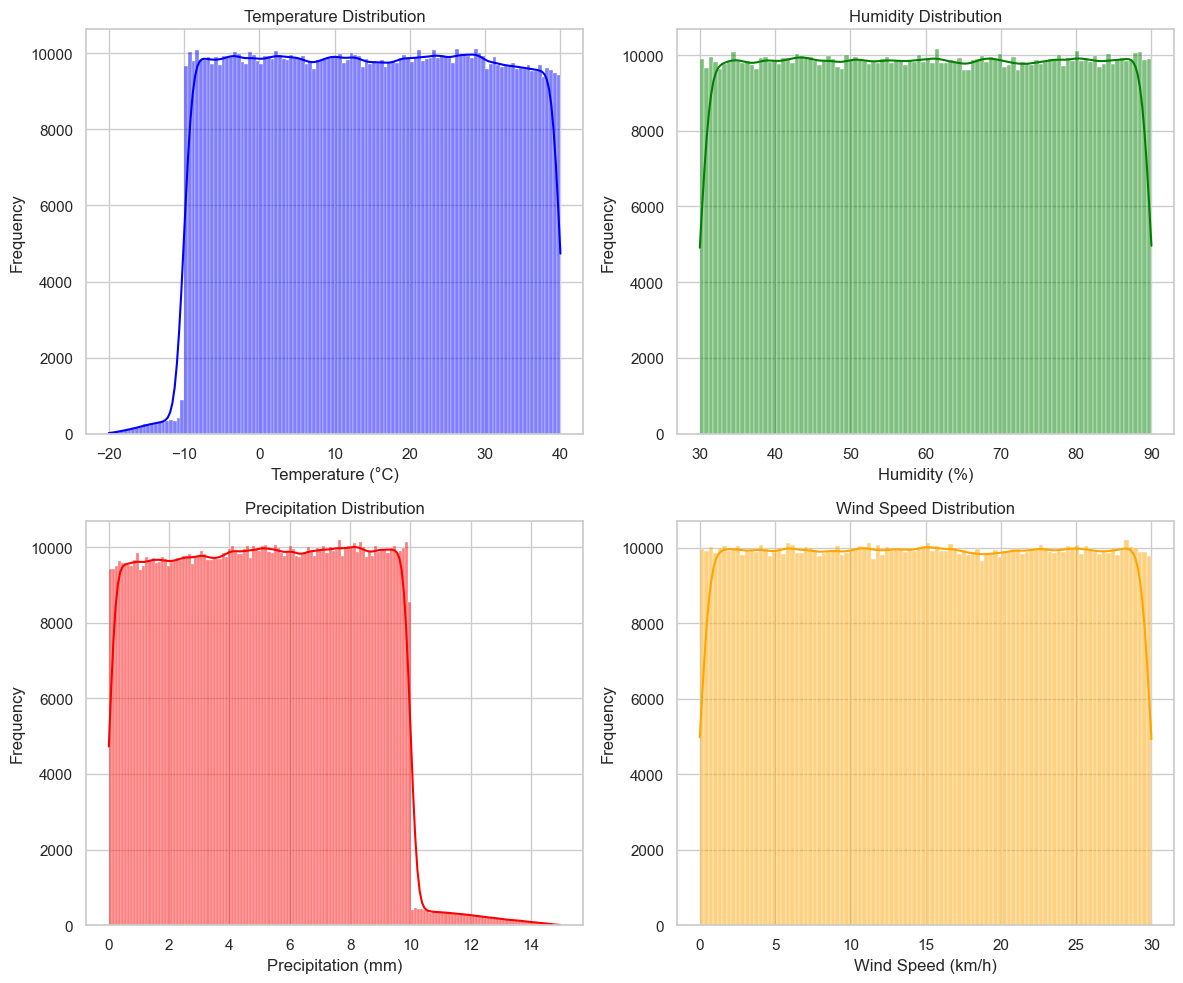

In [11]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create a list of the columns you want to plot
columns = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']

# Create a figure and axes to hold the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each variable
sns.histplot(df['Temperature_C'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Temperature Distribution')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['Humidity_pct'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Humidity Distribution')
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['Precipitation_mm'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Precipitation Distribution')
axes[1, 0].set_xlabel('Precipitation (mm)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df['Wind_Speed_kmh'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Wind Speed Distribution')
axes[1, 1].set_xlabel('Wind Speed (km/h)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



**Handling Missing & Duplicate Data**

In [12]:
# Impute missing values in numerical columns with the median
df = df.dropna(subset=['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh'])

# Verify that missing values have been handled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Location            36046
Date_Time           49683
Temperature_C           0
Humidity_pct            0
Precipitation_mm        0
Wind_Speed_kmh          0
dtype: int64


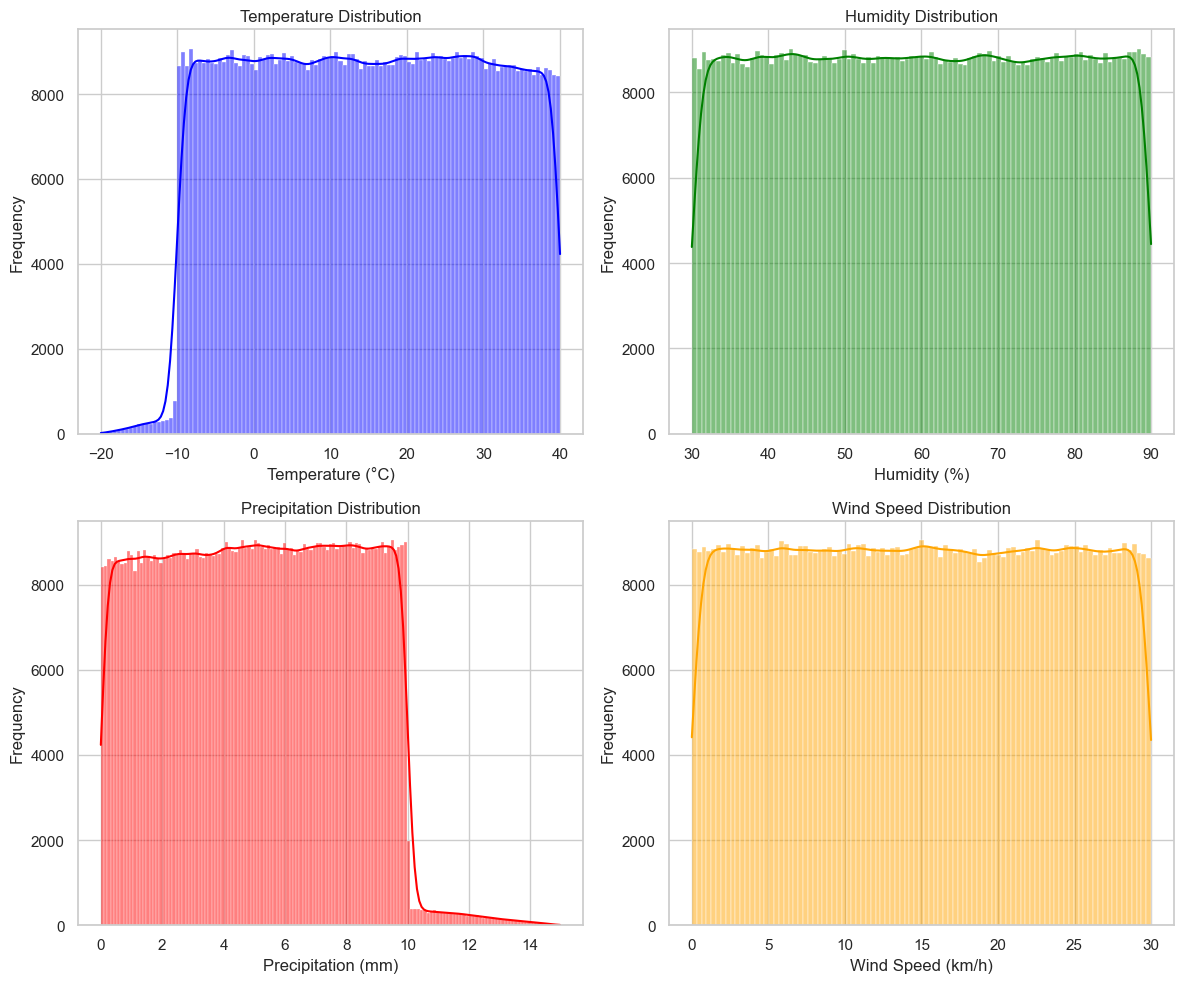

In [13]:
# Create a list of the columns you want to plot
columns = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']

# Create a figure and axes to hold the histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot histograms for each variable
sns.histplot(df['Temperature_C'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Temperature Distribution')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(df['Humidity_pct'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Humidity Distribution')
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(df['Precipitation_mm'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Precipitation Distribution')
axes[1, 0].set_xlabel('Precipitation (mm)')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(df['Wind_Speed_kmh'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Wind Speed Distribution')
axes[1, 1].set_xlabel('Wind Speed (km/h)')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



In [14]:
# Drop rows with missing values in categorical columns (e.g., 'Location')
df = df.dropna(subset=['Location', 'Date_Time'])

# Verify that missing values have been removed
print("Missing values after dropping categorical rows:")
print(df.isnull().sum())

Missing values after dropping categorical rows:
Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64


In [15]:
# Drop duplicate rows (keeping the first occurrence)
df = df.drop_duplicates(keep='first')

# Verify that duplicates have been removed
print("Duplicate rows remaining after removal:")
print(df.duplicated().sum())

Duplicate rows remaining after removal:
0


**Exploratory Data Analysis (EDA)**

1. Univariate Analysis

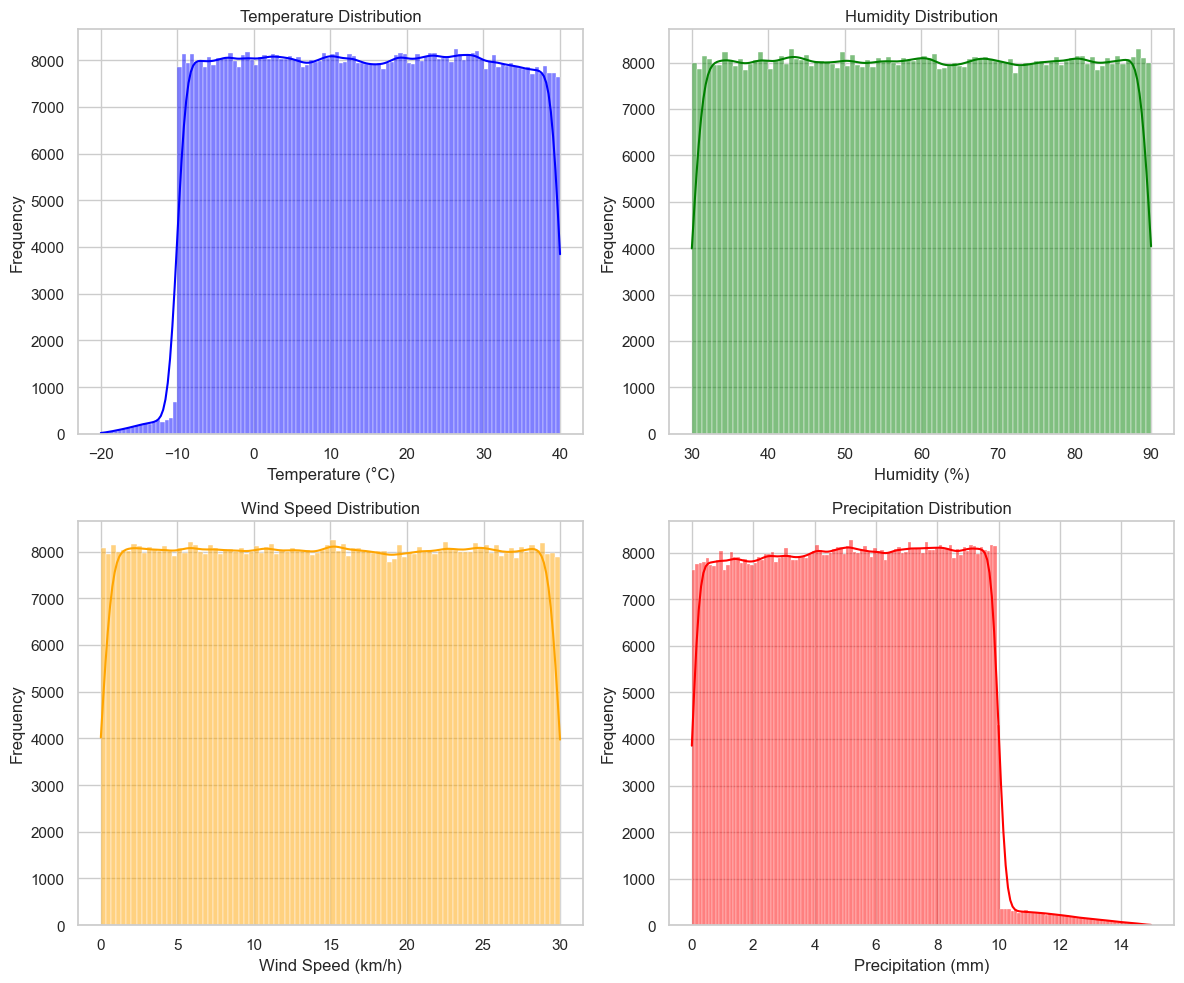

In [16]:
# Histogram and KDE for Temperature, Humidity, and Wind Speed
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Temperature Distribution
sns.histplot(df['Temperature_C'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Temperature Distribution')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')

# Humidity Distribution
sns.histplot(df['Humidity_pct'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Humidity Distribution')
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('Frequency')

# Wind Speed Distribution
sns.histplot(df['Wind_Speed_kmh'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Wind Speed Distribution')
axes[1, 0].set_xlabel('Wind Speed (km/h)')
axes[1, 0].set_ylabel('Frequency')

# Precipitation Distribution
sns.histplot(df['Precipitation_mm'], kde=True, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Precipitation Distribution')
axes[1, 1].set_xlabel('Precipitation (mm)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


2. Summary Statistics

In [17]:
summary_stats = df[['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']].describe()
print(summary_stats)


       Temperature_C   Humidity_pct  Precipitation_mm  Wind_Speed_kmh
count  722752.000000  722752.000000     722752.000000   722752.000000
mean       14.797445      60.008948          5.108698       14.989106
std        14.481043      17.329313          2.948862        8.662466
min       -19.969311      30.000028          0.000009        0.000051
25%         2.292608      44.977464          2.579449        7.480832
50%        14.795631      59.995516          5.107222       14.983838
75%        27.291422      75.038023          7.613856       22.503960
max        39.999801      89.999666         14.971583       29.999973


3. Outlier Detection

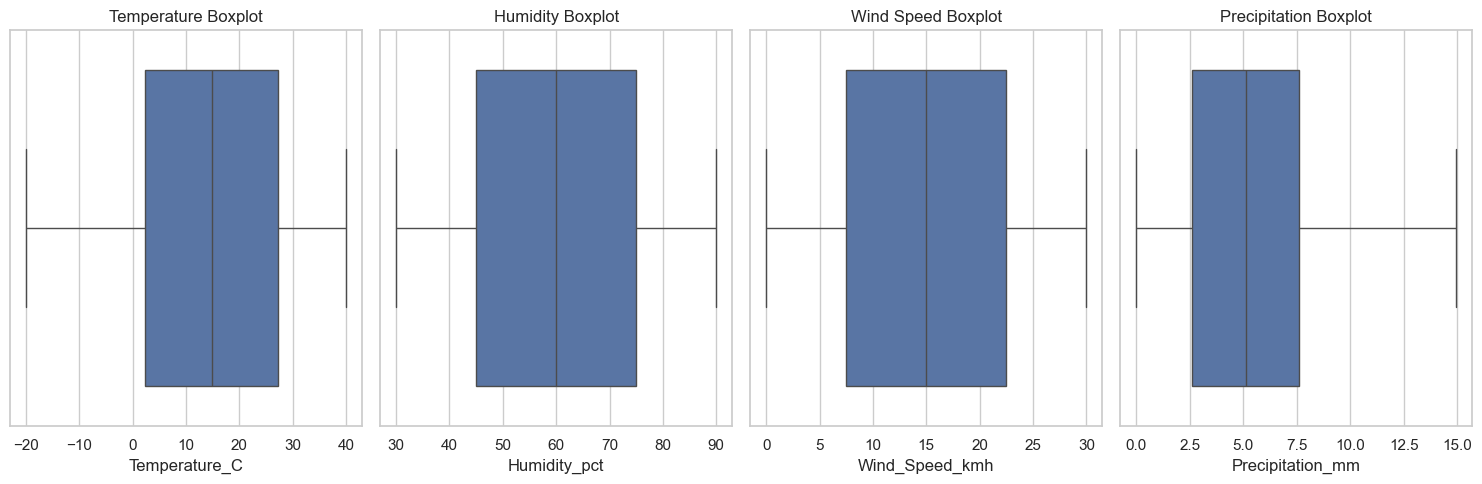

In [18]:
# Boxplot for detecting outliers in Temperature, Humidity, and Wind Speed
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Temperature
sns.boxplot(x=df['Temperature_C'], ax=axes[0])
axes[0].set_title('Temperature Boxplot')

# Humidity
sns.boxplot(x=df['Humidity_pct'], ax=axes[1])
axes[1].set_title('Humidity Boxplot')

# Wind Speed
sns.boxplot(x=df['Wind_Speed_kmh'], ax=axes[2])
axes[2].set_title('Wind Speed Boxplot')

# Precipitation
sns.boxplot(x=df['Precipitation_mm'], ax=axes[3])
axes[3].set_title('Precipitation Boxplot')


plt.tight_layout()
plt.show()


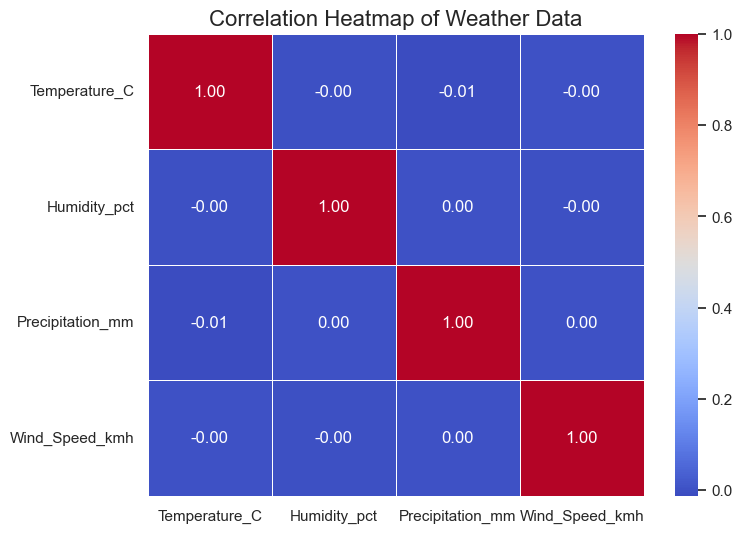

In [19]:

# Ensure the relevant columns are numeric
numeric_columns = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in any numeric column
df = df.dropna(subset=numeric_columns)

# Calculate the correlation matrix
corr_matrix = df[numeric_columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set plot title and labels
plt.title('Correlation Heatmap of Weather Data', fontsize=16)
plt.show()

**Data by Location**

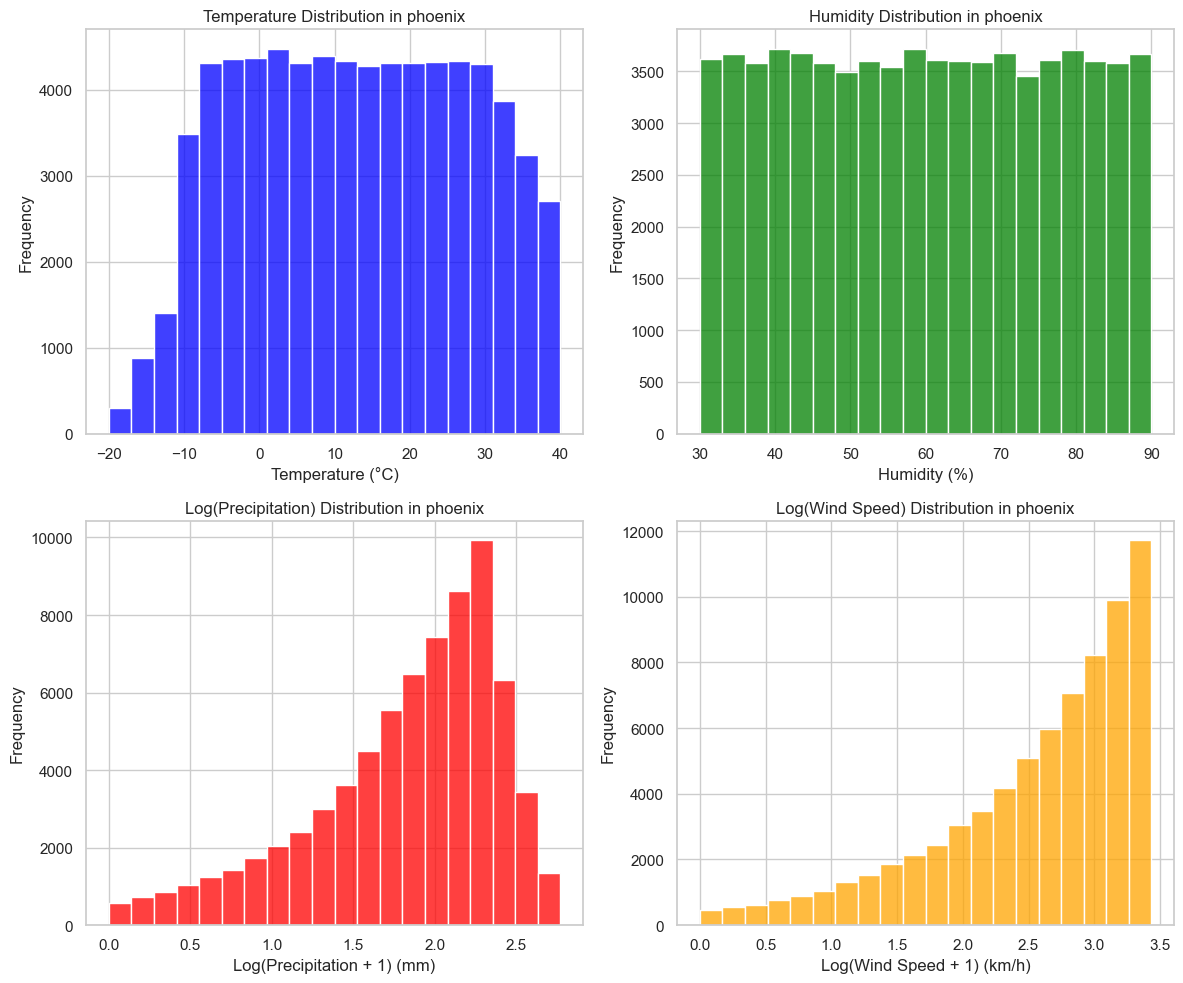

In [26]:
# Function to filter data by location and plot histograms
def plot_histograms_for_location(df, location):
    # Filter the dataframe for the selected location
    filtered_df = df[df['Location'].str.lower() == location.lower()]

    # Check if the location exists in the dataset
    if filtered_df.empty:
        print(f"No data available for location: {location}")
        return
    
    # Create a figure and axes to hold the histograms
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot histograms for each variable (without log transformation)
    sns.histplot(filtered_df['Temperature_C'], ax=axes[0, 0], color='blue', bins=20)
    axes[0, 0].set_title(f'Temperature Distribution in {location}')
    axes[0, 0].set_xlabel('Temperature (°C)')
    axes[0, 0].set_ylabel('Frequency')

    sns.histplot(filtered_df['Humidity_pct'], ax=axes[0, 1], color='green', bins=20)
    axes[0, 1].set_title(f'Humidity Distribution in {location}')
    axes[0, 1].set_xlabel('Humidity (%)')
    axes[0, 1].set_ylabel('Frequency')

    sns.histplot(np.log1p(filtered_df['Precipitation_mm']), ax=axes[1, 0], color='red', bins=20)  # Log transformation
    axes[1, 0].set_title(f'Log(Precipitation) Distribution in {location}')
    axes[1, 0].set_xlabel('Log(Precipitation + 1) (mm)')
    axes[1, 0].set_ylabel('Frequency')

    sns.histplot(np.log1p(filtered_df['Wind_Speed_kmh']), ax=axes[1, 1], color='orange', bins=20)  # Log transformation
    axes[1, 1].set_title(f'Log(Wind Speed) Distribution in {location}')
    axes[1, 1].set_xlabel('Log(Wind Speed + 1) (km/h)')
    axes[1, 1].set_ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Get user input for location
user_location = input("Enter the location to filter the data:(Phoenix, Houston, Philadelphia, Chicago, Dallas, San Antonio, Los Angeles, San Jose, San Diego, New York)").strip()

# Assuming df is your DataFrame loaded with the weather data
# Example: df = pd.read_csv('weather_data.csv')

# Call the function to plot histograms for the given location
plot_histograms_for_location(df, user_location)
